# *Import Libraries*

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# *Define functions*

In [3]:
def load_pickle(file_name):
    infile = open(file_name, 'rb')
    df = pickle.load(infile)
    infile.close()
    return df

# *Load data*
## Dictionary
- CFR = Case Fatality Ratio -> Death / Total Case
- RI = Recovery Index -> Recovered / Total Case
- RLI = Rasio Lacak Isolasi -> (OTG + ODP + Suspect + Probable)/Total Case

In [81]:
df_province_summary = load_pickle('pickle files/df_province_summary')
df_pcr = load_pickle('pickle files/df_pcr')
df_active_case = load_pickle('pickle files/df_active_case')

df_daily_case = load_pickle('pickle files/df_daily_case')
df_daily_death = load_pickle('pickle files/df_daily_death')
df_daily_recovered = load_pickle('pickle files/df_daily_recovered')

df_total_case = load_pickle('pickle files/df_total_case')
df_total_death = load_pickle('pickle files/df_total_death')
df_total_recovered = load_pickle('pickle files/df_total_recovered')

# *Exploratory Data Analysis*
## Metrics
- p0 (Progress to Zero): https://www.medrxiv.org/content/10.1101/2020.05.21.20109298v1.full.pdf+html
- R0 (R-naught): https://www.nytimes.com/2020/04/23/world/europe/coronavirus-R0-explainer.html
- RLI (Rasio Lacak Isolasi): https://kawalcovid19.id/content/1294/serial-data-virus-korona-2-rasio-lacak-isolasi-rli-dan-korelasinya-dengan-kematian-kumulatif

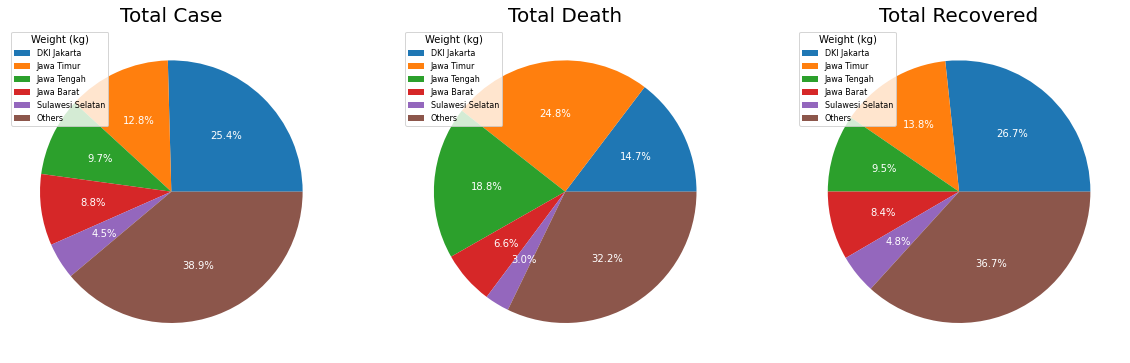

In [137]:
df_province_summary.sort_values(by='Covid19+ Total', ascending=False, inplace=True)

total_case = df_province_summary.iloc[:5,12]
total_case.loc['Others'] = df_province_summary.iloc[5:,12].sum()

total_death = df_province_summary.iloc[:5,15]
total_death.loc['Others'] = df_province_summary.iloc[5:,15].sum()

total_recovered = df_province_summary.iloc[:5,14]
total_recovered.loc['Others'] = df_province_summary.iloc[5:,14].sum()

# --------------------------- PLOT ---------------------------
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
wedges, text, autotexts = ax1.pie(total_case, autopct='%1.1f%%', textprops={'color':"w"})
ax1.set_title('Total Case', fontsize = 20)
ax1.legend(wedges, total_case.index, title="Weight (kg)", loc="upper left", fontsize=8)

wedges, text, autotexts = ax2.pie(total_death, autopct='%1.1f%%', textprops={'color':"w"})
ax2.set_title('Total Death', fontsize = 20)
ax2.legend(wedges, total_death.index, title="Weight (kg)", loc="upper left", fontsize=8)

wedges, text, autotexts = ax3.pie(total_recovered, autopct='%1.1f%%', textprops={'color':"w"})
ax3.set_title('Total Recovered', fontsize = 20)
ax3.legend(wedges, total_recovered.index, title="Weight (kg)", loc="upper left", fontsize=8)

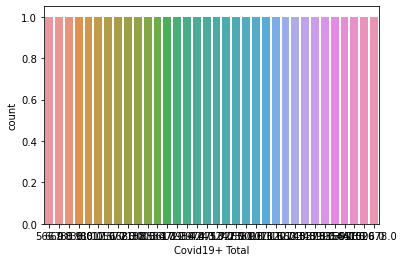

In [142]:
sns.countplot(x='Covid19+ Total', data=df_province_summary)

In [145]:
df_province_summary['Covid19+ Total']

Provinsi Asal
DKI Jakarta            102678
Jawa Timur              51506
Jawa Tengah             39036
Jawa Barat              35447
Sulawesi Selatan        18155
Riau                    13996
Sumatera Barat          13375
Kalimantan Timur        13348
Sumatera Utara          12745
Kalimantan Selatan      11662
Bali                    11520
Papua                    9071
Banten                   9013
Sumatera Selatan         7581
Aceh                     7265
Sulawesi Utara           5242
Sulawesi Tenggara        4713
Kalimantan Tengah        4243
Papua Barat              3974
Nusa Tenggara Barat      3934
Maluku                   3722
DI Yogyakarta            3617
Kepulauan Riau           3534
Gorontalo                3005
Maluku Utara             2188
Lampung                  1686
Kalimantan Barat         1577
Jambi                    1156
Bengkulu                 1017
Sulawesi Barat            988
Sulawesi Tengah           838
Kalimantan Utara          783
Nusa Tenggara Timur       